!['no_photo :-('](photo.png "Title")

> ##  A Simple Text-mining Tutorial
***


### Sections
[Packages](#Import-packages-and-set-path-to-your-local-directory) <br>
[Dataset](#Import-dataset-and-perform-basic-operations) <br>
[Simple bar chart](#Bar-chart) <br>
[Time series](#Experiment-with-more-months) <br>
[Frequency analysis](#Part-II)

## Packgages to install before the hackathon

#### conda install pandas 
#### conda install numpy 
#### conda install jupyter 
#### conda install -c anaconda nltk 
#### conda install -c plotly plotly 
#### conda install -c menpo pathlib 
#### conda install -c anaconda ipython 





## Import packages and set path to your local directory

In [237]:
import numpy as np # scientific computing with Python
import pandas as pd # dealing with dataframes
import nltk # Natural Language Toolkit
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from collections import Counter # self-explanatory
from ast import literal_eval # safely evaluate an expression node or a Unicode or Latin-1 encoded string containing a Python literal or container display
import plotly.plotly as py # package for interactive visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs
import cufflinks as cf
import glob # manages pathnames
from pathlib import Path # also manages pathnames   
from IPython.display import display
nltk.download('stopwords')
init_notebook_mode(connected=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kgyodi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Import dataset and perform basic operations

## Datasets can be downloaded from: https://drive.google.com/drive/folders/1AWYbdji4tNXhESPadtpXvAmzyAWqQztz
### In the first example let's import articles from Arstechnica, a well known website covering news and opinions in technology. We limit our analysis to articles published in the ancient times of January 2016. 

In [238]:
# please insert your local path after you download datasets
#path='/Volumes/GoogleDrive/My Drive/NGI/Engineroom/analysis/180814_all_tars/engineroom_news/mod_08/'
path='../mod_0909/'

In [239]:
# You can change the filename for another article

df=pd.read_csv(path+'dfs_articles2016-01arstechnica.csv', index_col=0)

In [240]:
# columns of our data frame (df)
df.columns

Index(['text', 'author', 'site', 'link', 'text_token', 'text_token_lower',
       'text_token_stemmed', 'text_token_count'],
      dtype='object')

In [8]:
# check the length of our df
len(df)

480

### Each entry in the df refers to an another article. Besides the self-explanatory metadata e.g. 'author' column you can find some preprocessed data. We have already tokenized articles' text for you and performed stemming on it. You can find the result in the 'text_token_stemmed' column. Moreover, we have checked frequency of all tokens, see: 'text_token_count'.

In [9]:
# print first five entries, to check last five just use 'tail'
df.head()

,text,author,site,link,text_token,text_token_lower,text_token_stemmed,text_token_count
5944,"\n\n\n\nWithin the past year, Congress voted t...",CYRUS FARIVAR,arstechnica,https://arstechnica.com/tech-policy/2016/01/in...,"['Within', 'the', 'past', 'year', 'Congress', ...","['within', 'the', 'past', 'year', 'congress', ...","['within', 'the', 'past', 'year', 'congress', ...","{'within': 1, 'the': 79, 'past': 1, 'year': 5,..."
10926,"Clean water is essential, yet in certain parts...",SHALINI SAXENA,arstechnica,https://arstechnica.com/science/2016/01/reusab...,"['Clean', 'water', 'is', 'essential', 'yet', '...","['clean', 'water', 'is', 'essential', 'yet', '...","['clean', 'water', 'is', 'essenti', 'yet', 'in...","{'clean': 1, 'water': 3, 'is': 2, 'essenti': 1..."
10925,"Carpenter ants live in a caste system, where s...",ANNALEE NEWITZ,arstechnica,https://arstechnica.com/science/2016/01/slight...,"['Carpenter', 'ants', 'live', 'in', 'a', 'cast...","['carpenter', 'ants', 'live', 'in', 'a', 'cast...","['carpent', 'ant', 'live', 'in', 'a', 'cast', ...","{'carpent': 2, 'ant': 6, 'live': 1, 'in': 15, ..."
11929,"\n\n\n\nOK, we'll admit it—there was a lot of ...",JONATHAN M. GITLIN,arstechnica,https://arstechnica.com/cars/2016/01/ars-drive...,"['OK', 'well', 'admit', 'itthere', 'was', 'a',...","['ok', 'well', 'admit', 'itthere', 'was', 'a',...","['ok', 'well', 'admit', 'itther', 'was', 'a', ...","{'ok': 1, 'well': 2, 'admit': 1, 'itther': 1, ..."
2875,The coming of the new year gives us an opportu...,SEAN GALLAGHER,arstechnica,https://arstechnica.com/information-technology...,"['The', 'coming', 'of', 'the', 'new', 'year', ...","['the', 'coming', 'of', 'the', 'new', 'year', ...","['the', 'come', 'of', 'the', 'new', 'year', 'g...","{'the': 83, 'come': 2, 'of': 42, 'new': 5, 'ye..."


### Right now we have one list per row in the column 'text_token_stemmed'. Let's use list comprehension (more help for this online) to create a single list. 

In [10]:
flat_list = [item for sublist in df['text_token_stemmed'].apply(literal_eval) for item in sublist]

#### Let's use NLTK package to remove some common stopwords from our list, e.g. 'the', 'of'.

In [11]:
no_stop_words_list = [word for word in flat_list if word not in stopwords.words('english')]

In [12]:
# count tokens 
count_tokens=Counter(no_stop_words_list)

#### Now we can check what are the most common tokens in our dataset

In [13]:
count_tokens.most_common()[:20]

[('use', 1080),
 ('compani', 833),
 ('also', 726),
 ('new', 708),
 ('one', 689),
 ('year', 654),
 ('like', 650),
 ('would', 645),
 ('said', 638),
 ('time', 532),
 ('make', 504),
 ('could', 452),
 ('system', 435),
 ('us', 431),
 ('work', 409),
 ('research', 409),
 ('get', 399),
 ('includ', 392),
 ('provid', 385),
 ('report', 384)]

### As you can clearly see they most of the are still rather generic. Assuming that our task is to identify significant tokens that would tell us story about the state of technology discussion this list would be of little help. Can you come up with a better solution to tackle this problem? 

#### (...) OK, you have found a slightly/significantly/radically better solution. Now you'd probably like to present your meaningful results. A good old bar chart is good for starters. Let's prepare it using plotly package and our poorly filtered, 'generic' results.

In [14]:
bar_chart=count_tokens.most_common()[:10]

In [15]:
bar_chart=pd.DataFrame(bar_chart)

#### Bar chart

In [16]:
plotly.offline.plot({
"data": [
    plotly.graph_objs.Bar(x=bar_chart[0],y=bar_chart[1])
]
})

'file:///Volumes/GoogleDrive/My Drive/NGI/Engineroom/analysis/temp-plot.html'

## Experiment with more months

### Let's import all months for arts technica articles

In [247]:
all_files = glob.glob(path + '/*arstechnica.csv')
dfs = []
for file in all_files:
    df = pd.read_csv(file)
    df['month']=file.split('/')[-1].replace('dfs_articles','')[:7]
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df.shape

(12229, 10)

In [248]:
df['month']=pd.to_datetime(df['month'],format='%Y-%m')

In [249]:
#df['month'].unique()

#### We have data from 2016-12 to 2018-03

In [251]:
# Let's shorten the period to 2017-12/2018-03 for quicker calculation
df=df.loc[(df['month']>'2017-12-01')& (df['month']<'2018-04-01')]

In [252]:
len(df)

1044

#### Our dataset now contains articles for a few months

In [253]:
df.head()

,Unnamed: 0,text,author,site,link,text_token,text_token_lower,text_token_stemmed,text_token_count,month
0,122,"Microsoft and Bill & Melinda Gates Foundation progenitor Bill Gates is not a fan of cryptocurrencies. In a Reddit AMA yesterday, he posited that cryptocurrencies subvert governments' abilities to intercept terrorist funding, illegal drug transactions, and more.\n\nRedditor Askur1337 asked Gates, ""Whats your opinion on Crypto Currencies?"" To this, Gates responded:\n\nThe main feature of cryptocurrencies is their anonymity. I don't think this is a good thing. The government's ability to find money laundering and tax evasion and terrorist funding is a good thing. Right now, cryptocurrencies are used for buying fentanyl and other drugs, so it is a rare technology that has caused deaths in a fairly direct way. I think the speculative wave around ICOs and cryptocurrencies is super risky for those who go long.\n\nRedditor dikkepiemel followed up with a rebuttal that cryptocurrencies aren't doing anything cash wasn't already doing, saying, ""The US dollar is also used to buy fentanyl and go...",SAMUEL AXON,arstechnica,https://arstechnica.com/tech-policy/2018/02/bill-gates-says-cryptocurrencies-have-caused-deaths-in-a-fairly-direct-way/,"['Microsoft', 'and', 'Bill', 'Melinda', 'Gates', 'Foundation', 'progenitor', 'Bill', 'Gates', 'is', 'not', 'a', 'fan', 'of', 'cryptocurrencies', 'In', 'a', 'Reddit', 'AMA', 'yesterday', 'he', 'posited', 'that', 'cryptocurrencies', 'subvert', 'governments', 'abilities', 'to', 'intercept', 'terrorist', 'funding', 'illegal', 'drug', 'transactions', 'and', 'more', 'Redditor', 'Askur1337', 'asked', 'Gates', 'Whats', 'your', 'opinion', 'on', 'Crypto', 'Currencies', 'To', 'this', 'Gates', 'responded', 'The', 'main', 'feature', 'of', 'cryptocurrencies', 'is', 'their', 'anonymity', 'I', 'dont', 'think', 'this', 'is', 'a', 'good', 'thing', 'The', 'governments', 'ability', 'to', 'find', 'money', 'laundering', 'and', 'tax', 'evasion', 'and', 'terrorist', 'funding', 'is', 'a', 'good', 'thing', 'Right', 'now', 'cryptocurrencies', 'are', 'used', 'for', 'buying', 'fentanyl', 'and', 'other', 'drugs', 'so', 'it', 'is', 'a', 'rare', 'technology', 'that', 'has', 'caused', 'deaths', 'in', 'a', 'fairly'...","['microsoft', 'and', 'bill', 'melinda', 'gates', 'foundation', 'progenitor', 'bill', 'gates', 'is', 'not', 'a', 'fan', 'of', 'cryptocurrencies', 'in', 'a', 'reddit', 'ama', 'yesterday', 'he', 'posited', 'that', 'cryptocurrencies', 'subvert', 'governments', 'abilities', 'to', 'intercept', 'terrorist', 'funding', 'illegal', 'drug', 'transactions', 'and', 'more', 'redditor', 'askur1337', 'asked', 'gates', 'whats', 'your', 'opinion', 'on', 'crypto', 'currencies', 'to', 'this', 'gates', 'responded', 'the', 'main', 'feature', 'of', 'cryptocurrencies', 'is', 'their', 'anonymity', 'i', 'dont', 'think', 'this', 'is', 'a', 'good', 'thing', 'the', 'governments', 'ability', 'to', 'find', 'money', 'laundering', 'and', 'tax', 'evasion', 'and', 'terrorist', 'funding', 'is', 'a', 'good', 'thing', 'right', 'now', 'cryptocurrencies', 'are', 'used', 'for', 'buying', 'fentanyl', 'and', 'other', 'drugs', 'so', 'it', 'is', 'a', 'rare', 'technology', 'that', 'has', 'caused', 'deaths', 'in', 'a', 'fairly'...","['microsoft', 'and', 'bill', 'melinda', 'gate', 'foundat', 'progenitor', 'bill', 'gate', 'is', 'not', 'a', 'fan', 'of', 'cryptocurr', 'in', 'a', 'reddit', 'ama', 'yesterday', 'he', 'posit', 'that', 'cryptocurr', 'subvert', 'govern', 'abil', 'to', 'intercept', 'terrorist', 'fund', 'illeg', 'drug', 'transact', 'and', 'more', 'redditor', 'askur1337', 'ask', 'gate', 'what', 'your', 'opinion', 'on', 'crypto', 'currenc', 'to', 'this', 'gate', 'respond', 'the', 'main', 'featur', 'of', 'cryptocurr', 'is', 'their', 'anonym', 'i', 'dont', 'think', 'this', 'is', 'a', 'good', 'thing', 'the', 'govern', 'abil', 'to', 'find', 'money', 'launder', 'and', 'tax', 'evas', 'and', 'terrorist', 'fund', 'is', 'a', 'good', 'thing', 'right', 'now', 'cr

In [10]:
df['text_token_stemmed'] = df['text_token_stemmed'].apply(literal_eval) #We need to apply literal_eval so that Python knows we are dealing with words

#### Let's group articles by month for further analysis

In [11]:
df_gr=df.groupby('month')['text_token_stemmed'].sum()

In [12]:
df=pd.DataFrame(df_gr)

In [13]:
df.reset_index(inplace=True, drop=False)

In [14]:
df #our dataset contains now aggaregated text for every month

,month,text_token_stemmed
0,2018-01-01,"[on, novemb, 3, 2007, six, vehicl, made, histo..."
1,2018-02-01,"[microsoft, has, post, the, result, of, the, s..."
2,2018-03-01,"[microsoft, and, bill, melinda, gate, foundat,..."


In [15]:
df['no_stop_words']=df['text_token_stemmed'].apply(lambda x: [item for item in x if item not in stopwords.words('english')]) #This will count for a few minutes

In [16]:
df.head()

,month,text_token_stemmed,no_stop_words
0,2018-01-01,"[on, novemb, 3, 2007, six, vehicl, made, histo...","[novemb, 3, 2007, six, vehicl, made, histori, ..."
1,2018-02-01,"[microsoft, has, post, the, result, of, the, s...","[microsoft, post, result, second, quarter, 201..."
2,2018-03-01,"[microsoft, and, bill, melinda, gate, foundat,...","[microsoft, bill, melinda, gate, foundat, prog..."


In [17]:
df['counts']=df['no_stop_words'].apply(lambda x: Counter(x)) # Let's calculate the words

In [18]:
df['counts'] # this shows by month word frequency

0    {'shanti': 1, '47mm': 1, 'vmware': 7, 'matrix'...
1    {'antifung': 1, 'diseas': 35, 'examplebut': 1,...
2    {'cda': 1, 'pedalsmak': 1, 'cathod': 5, 'antif...
Name: counts, dtype: object

### Let's analyse for a keyword of interest how frequency changed over time

In [19]:
keyword='blockchain'
df['keyword']=df['counts'].apply(lambda x: x.get(keyword, 0))

In [20]:
df.head()  #so our keyword appeared 25 times in december and 9 times in march

,month,text_token_stemmed,no_stop_words,counts,keyword
0,2018-01-01,"[on, novemb, 3, 2007, six, vehicl, made, histo...","[novemb, 3, 2007, six, vehicl, made, histori, ...","{'shanti': 1, '47mm': 1, 'vmware': 7, 'matrix'...",32
1,2018-02-01,"[microsoft, has, post, the, result, of, the, s...","[microsoft, post, result, second, quarter, 201...","{'antifung': 1, 'diseas': 35, 'examplebut': 1,...",32
2,2018-03-01,"[microsoft, and, bill, melinda, gate, foundat,...","[microsoft, bill, melinda, gate, foundat, prog...","{'cda': 1, 'pedalsmak': 1, 'cathod': 5, 'antif...",9


### For a more thorough analysis we should not restrict ourselves for only selected keywords. Let's calculate changes over time for all words!

In [21]:
x=pd.DataFrame(columns=['index'])
for i in range(len(df)):
    y=pd.DataFrame.from_dict(df['counts'][i], orient='index').reset_index()
    y.rename(columns={0:df['month'][i]},inplace=True)
    x=pd.merge(x,y,on='index',how='outer')

In [22]:
x.head() #this df shows us the frequencies for every word

,index,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00
0,shanti,1.0,NaN,NaN
1,47mm,1.0,NaN,NaN
2,vmware,7.0,NaN,NaN
3,matrix,2.0,5.0,NaN
4,diseas,21.0,35.0,14.0


In [23]:
x['p_diff']=(x.iloc[:,-1]-x.iloc[:,1])/x.iloc[:,1]*100 # p_diff shows us the percentage change between the first and last months in our dataset

In [24]:
x.head() 

,index,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,p_diff
0,shanti,1.0,NaN,NaN,NaN
1,47mm,1.0,NaN,NaN,NaN
2,vmware,7.0,NaN,NaN,NaN
3,matrix,2.0,5.0,NaN,NaN
4,diseas,21.0,35.0,14.0,-33.333333


In [ ]:
## some transformations before the visualisations

x=x.sort_values(by='p_diff', ascending=False)
x=x.transpose()
x.rename(columns=x.iloc[0],inplace=True)
x=x[1:]
x.drop(x.tail(1).index,inplace=True) # drop last n rows
multi_line=x.iloc[:,:7]

In [155]:
x

NameError: name 'x' is not defined

### Sometimes at first glance identified keywords might seem irrelevant but when you check them more closely they turn out to be significant. This is such a case. Consider 'versa' or 'lifelin' tokens. I didn't connect them with new technologies in the beginning but after brief googling them it appears that Versa is a new model of smartwatch and Lifeline is an important US subsidy programme in the Telecommunications industry.

In [64]:
iplot(multi_line.iplot(asFigure=True,
                               kind='scatter',xTitle='Months',yTitle='Counts',title=''))

NameError: name 'multi_line' is not defined

# Part II

## Working with processed text date
### Here we will not use the raw text data, but the calculated word frequencies in the raw data

#### Analysis based on the frequency of appearances for all unigrams and bigrams in the texts
#### Frequency: number of appearances of every term divided by the number of published articles (for every month and source)
#### This measure reveals how many times an expression has been mentioned on average per article
#### Several media sources: a representative index is calculated with weighted average
#### coef: Average monthly change in the analised term's frequency is calculated by OLS regressions
#### The dependent variable of the estimation is the frequency index, while the number of months since the beginning of the analysed period (January 2016) is the independent variable
#### Coef shows by how much on average the analysed expression’s frequency changed with every observed month (marginal change of the frequency), revealing which keywords had the biggest monthly growth
#### Coef_norm and coef_norm_mx are the normalised form of coef

In [256]:
# Let's import the data with coefficients calculated based on tokenised unigrams
path='/../res_0909/coefs_1weighted_site.csv'

In [257]:
df=pd.read_csv(path, index_col=0)

FileNotFoundError: File b'/.../res_0909/coefs_1weighted_site.csv' does not exist

In [172]:
#columns of our data frame (df)
df.columns #As you can see, we have calculated the frequency for very word

Index(['freq_2018-08', 'freq_2018-07', 'freq_2018-06', 'freq_2018-05',
       'freq_2018-04', 'freq_2018-03', 'freq_2018-02', 'freq_2018-01',
       'freq_2017-12', 'freq_2017-11', 'freq_2017-10', 'freq_2017-09',
       'freq_2017-08', 'freq_2017-07', 'freq_2017-06', 'freq_2017-05',
       'freq_2017-04', 'freq_2017-03', 'freq_2017-02', 'freq_2017-01',
       'freq_2016-12', 'freq_2016-11', 'freq_2016-10', 'freq_2016-09',
       'freq_2016-08', 'freq_2016-07', 'freq_2016-06', 'freq_2016-05',
       'freq_2016-04', 'freq_2016-03', 'freq_2016-02', 'freq_2016-01',
       'coef_norm', 'coef_norm_max', 'coef'],
      dtype='object')

In [173]:
# check the length of our df
len(df) #almost 75k unigrams

74482

In [174]:
# print first five entries, to check last five just use 'tail'
df.head()

,freq_2018-08,freq_2018-07,freq_2018-06,freq_2018-05,freq_2018-04,freq_2018-03,freq_2018-02,freq_2018-01,freq_2017-12,freq_2017-11,...,freq_2016-07,freq_2016-06,freq_2016-05,freq_2016-04,freq_2016-03,freq_2016-02,freq_2016-01,coef_norm,coef_norm_max,coef
the,37.056363,37.081502,36.362193,36.265254,38.290656,36.892588,35.648119,34.306137,37.113897,37.281825,...,33.242451,30.139494,29.363555,32.108097,31.166354,31.698902,30.066166,0.006185,0.005622,0.215275
to,21.541353,21.100525,21.368631,21.052978,22.368968,20.863747,20.426503,19.906267,21.348270,21.525584,...,18.764140,17.005678,16.660130,18.601902,17.813624,17.604342,16.705258,0.006992,0.006223,0.139192
of,17.675905,17.466635,17.666530,17.468227,18.681636,17.302120,17.171655,16.246601,17.818787,17.746266,...,15.625277,14.150038,13.816681,14.858147,14.459303,14.482511,14.078141,0.007307,0.006428,0.120088
and,17.959034,17.475849,17.469527,17.140678,18.495243,17.275354,16.631577,16.462514,17.730204,17.710685,...,15.682630,14.243556,13.556952,14.955848,14.396546,14.174071,13.847451,0.007216,0.006394,0.118261
a,16.374574,15.939555,16.461464,15.990206,16.575330,16.071832,15.764202,15.233668,16.398040,16.608227,...,14.787194,13.476749,13.284766,14.614670,13.758060,13.799080,13.101854,0.005730,0.005318,0.088325


#### We have not removed the stopwords
#### Their frequency should not change over time, therefore we do not have to worry about them

In [175]:
df_sort=df.loc[df['coef_norm']>0.025].sort_values('coef', ascending=False) #let's sort by coef, and use coef_norm treshold to remove uninteresting words (stopwords!)

In [176]:
df_sort.head()

,freq_2018-08,freq_2018-07,freq_2018-06,freq_2018-05,freq_2018-04,freq_2018-03,freq_2018-02,freq_2018-01,freq_2017-12,freq_2017-11,...,freq_2016-07,freq_2016-06,freq_2016-05,freq_2016-04,freq_2016-03,freq_2016-02,freq_2016-01,coef_norm,coef_norm_max,coef
facebook,0.691789,0.938504,0.704737,0.799504,1.551831,1.457819,0.480817,0.566736,0.640504,0.658798,...,0.508581,0.429258,0.516099,0.562654,0.349790,0.425736,0.389665,0.027305,0.010764,0.016704
ai,0.551516,0.444421,0.602350,0.507660,0.544091,0.436456,0.460527,0.410719,0.518325,0.642009,...,0.176713,0.111236,0.109621,0.057965,0.120010,0.050916,0.082339,0.048121,0.025892,0.016623
2018,0.391576,0.391525,0.373125,0.353062,0.383118,0.424902,0.437326,0.530771,0.329986,0.161702,...,0.023988,0.021660,0.020859,0.022350,0.024140,0.023019,0.018493,0.100980,0.028012,0.014868
2017,0.267850,0.260101,0.281343,0.256906,0.289900,0.315720,0.333033,0.429080,0.392506,0.281522,...,0.051749,0.050395,0.047643,0.040063,0.031756,0.034979,0.040276,0.046555,0.024355,0.010450
machin,0.420034,0.334845,0.499722,0.430519,0.650738,0.401076,0.339057,0.358827,0.449848,0.412598,...,0.231271,0.228089,0.195359,0.181667,0.227221,0.181607,0.188049,0.025725,0.013434,0.008742


#### most growing words are facebook and ai
#### Let's prepare a simple visualisation

In [177]:
df_sort=df_sort.transpose()


In [178]:
df_sort

,facebook,ai,2018,2017,machin,amazon,5g,cryptocurr,sponsor,cambridg,...,yngve,oreppa,slyngstad,vehicleshar,shieldlik,weider,uncategor,antipoli,drainpip,dulllook
freq_2018-08,0.691789,0.551516,0.391576,0.267850,0.420034,0.375393,0.237334,0.061199,0.189330,0.042821,...,1.428571e-04,1.428571e-04,1.428571e-04,1.428571e-04,0.000000e+00,1.285347e-04,1.285347e-04,1.285347e-04,1.257862e-04,1.257862e-04
freq_2018-07,0.938504,0.444421,0.391525,0.260101,0.334845,0.427819,0.248674,0.078838,0.187104,0.094493,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.394700e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
freq_2018-06,0.704737,0.602350,0.373125,0.281343,0.499722,0.371008,0.154382,0.102157,0.187459,0.061641,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
freq_2018-05,0.799504,0.507660,0.353062,0.256906,0.430519,0.402594,0.148557,0.097911,0.185012,0.172474,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
freq_2018-04,1.551831,0.544091,0.383118,0.289900,0.650738,0.552405,0.168131,0.104159,0.196356,0.348580,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
freq_2018-03,1.457819,0.436456,0.424902,0.315720,0.401076,0.309785,0.197383,0.136180,0.187539,0.511789,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
freq_2018-02,0.480817,0.460527,0.437326,0.333033,0.339057,0.333155,0.382688,0.256702,0.192476,0.019414,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
freq_2018-01,0.566736,0.410719,0.530771,0.429080,0.358827,0.391315,0.248985,0.298314,0.187278,0.009218,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
freq_2017-12,0.640504,0.518325,0.329986,0.392506,0.449848,0.404166,0.152826,0.247508,0.016969,0.008330,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
freq_2017-11,0.658798,0.642009,0.161702,0.281522,0.412598,0.422259,0.126756,0.111292,0.030593,0.040382,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [179]:
#Let's focus on the most trending words
df_sort=df_sort[['facebook', 'ai', 'machin', 'amazon', '5g', 'cryptocurr', 'cambridg']]


In [180]:
# erase last 3 rows

df_sort.drop(df_sort.tail(3).index,inplace=True)

/Users/kgyodi/miniconda3/envs/myPython/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [181]:
# change the index for the visualisation
df_sort.reset_index(inplace=True)
df_sort['date']=df_sort['index'].str.replace('freq_', '')
df_sort['date']=pd.to_datetime(df_sort['date'])


/Users/kgyodi/miniconda3/envs/myPython/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/kgyodi/miniconda3/envs/myPython/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [182]:
df_sort=df_sort.drop('index', 1)
df_sort['date']=df_sort.index
df_sort=df_sort.set_index(df_sort['date'])


In [183]:
df_sort=df_sort.set_index(df_sort['date'])

In [187]:
df_sort=df_sort.drop('date', 1)

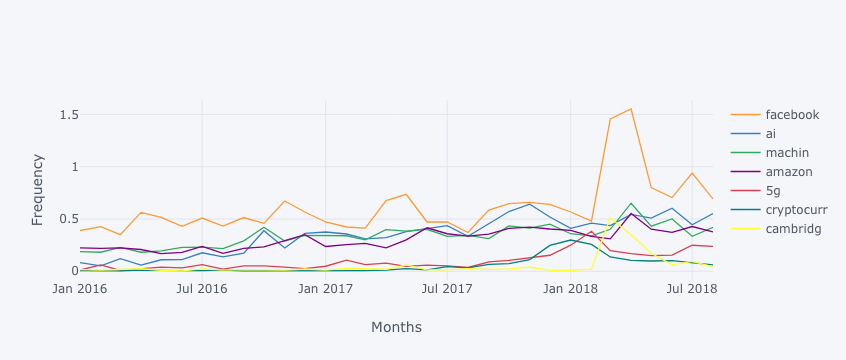

In [188]:
iplot(df_2.iplot(asFigure=True,
                               kind='scatter',xTitle='Months',yTitle='Frequency',title=''))

# Co-occurrence analysis

## Let's explore the relationship between topics

### Pairs of terms which are mentioned together in media articles
### Most trending social issues have been selected
### The co-occurrence analysis is calculated for pairs consisting of emerging social issues and trending uni/bigrams
### The number of times the terms appear in articles together with a social issue is divided by the number of times the social issue is mentioned across all articles
### A single index is constructed for all word pairs by weighted average (with the same weights as in the case of frequencies)
### You can choose between all combinatios of co-occurring unigrams and bigrams (4)

In [223]:
# import dataframe- this one is for bigrams-bigrams
path='/Volumes/GoogleDrive/My Drive/NGI/Engineroom/analysis/181106_hackathon/res_0909/cooc22weighted.csv'
df=pd.read_csv(path, index_col=0)
#df.rename(columns={'Unnamed: 0':'word'},inplace=True)

In [225]:
#df['index']

In [226]:
##for convenience let's increase number of rows that can be printed

pd.options.display.max_colwidth = 1000
pd.set_option('display.max_rows',1000)

In [227]:
df.reset_index(inplace=True)

In [232]:
df=df.rename(columns={'index': 'word'})

In [233]:
df.columns

Index(['word', 'internet freedom_count_freq_weighted',
       'internet freedom_count_freq_weighted_normalized',
       'internet freedom_count_freq_weighted_normalized_root',
       'internet freedom_bool_freq_weighted',
       'internet freedom_bool_freq_weighted_normalized',
       'internet freedom_bool_freq_weighted_normalized_root',
       'russian interfer_count_freq_weighted',
       'russian interfer_count_freq_weighted_normalized',
       'russian interfer_count_freq_weighted_normalized_root',
       ...
       'network neutral_count_freq_weighted_normalized_root',
       'network neutral_bool_freq_weighted',
       'network neutral_bool_freq_weighted_normalized',
       'network neutral_bool_freq_weighted_normalized_root',
       'person data_count_freq_weighted',
       'person data_count_freq_weighted_normalized',
       'person data_count_freq_weighted_normalized_root',
       'person data_bool_freq_weighted',
       'person data_bool_freq_weighted_normalized',
       'pe

### The columns are the selected social issues for which we calculated co-occurrences
### 3 different methods: count_freq_weighted / freq_weighted_normalized_root /  freq_weighted_normalized_root

### In our analysis, we have used count_freq_weighted

In [234]:
cols=[]
for i in df.columns:
    if 'count' in str(i):
        cols.append(i)
        print (i)

internet freedom_count_freq_weighted
internet freedom_count_freq_weighted_normalized
internet freedom_count_freq_weighted_normalized_root
russian interfer_count_freq_weighted
russian interfer_count_freq_weighted_normalized
russian interfer_count_freq_weighted_normalized_root
cambridg analytica_count_freq_weighted
cambridg analytica_count_freq_weighted_normalized
cambridg analytica_count_freq_weighted_normalized_root
autonom weapon_count_freq_weighted
autonom weapon_count_freq_weighted_normalized
autonom weapon_count_freq_weighted_normalized_root
hate speech_count_freq_weighted
hate speech_count_freq_weighted_normalized
hate speech_count_freq_weighted_normalized_root
youtub kid_count_freq_weighted
youtub kid_count_freq_weighted_normalized
youtub kid_count_freq_weighted_normalized_root
chines tech_count_freq_weighted
chines tech_count_freq_weighted_normalized
chines tech_count_freq_weighted_normalized_root
distribut ledger_count_freq_weighted
distribut ledger_count_freq_weighted_normaliz

In [236]:
for i in cols:
    df=df.sort_values(i, ascending=False)
    print(i)
    display(df[['word', i]][:30])

internet freedom_count_freq_weighted


,word,internet freedom_count_freq_weighted
9110,net neutral,251.634109
7035,internet freedom,99.000000
9175,neutral rule,64.512457
9615,open internet,47.040477
11369,restor internet,42.842610
989,ajit pai,42.356292
5190,feder communic,29.486463
3060,communic commiss,28.253905
5156,fcc chairman,26.418846
5580,freedom order,22.244609


internet freedom_count_freq_weighted_normalized


,word,internet freedom_count_freq_weighted_normalized
11369,restor internet,39764.470248
7035,internet freedom,39703.393926
5580,freedom order,37540.001288
3765,dc court,19045.763662
9881,pai order,17463.375914
2995,comment server,15521.577909
9177,neutral vote,14521.784172
7040,internet pioneer,13417.543176
5093,fake comment,11211.926067
7640,kill net,10981.215923


internet freedom_count_freq_weighted_normalized_root


,word,internet freedom_count_freq_weighted_normalized_root
7035,internet freedom,1982.583163
11369,restor internet,1305.225529
9110,net neutral,1189.033634
5580,freedom order,913.817619
9175,neutral rule,561.100466
9615,open internet,546.245384
989,ajit pai,488.702712
7039,internet order,399.115465
5156,fcc chairman,378.183246
7040,internet pioneer,359.223615


russian interfer_count_freq_weighted


,word,russian interfer_count_freq_weighted
11638,russian interfer,87.000000
2447,cambridg analytica,62.822648
10475,presidenti elect,59.002167
6976,intellig committe,34.676020
7113,investig into,34.561873
14086,us elect,34.198987
5098,fake news,32.929562
13784,trump campaign,31.225312
14116,us presidenti,29.797870
7043,internet research,28.354902


russian interfer_count_freq_weighted_normalized


,word,russian interfer_count_freq_weighted_normalized
11638,russian interfer,34897.125150
1075,alleg russian,29328.226122
6721,includ attack,21021.655152
12554,sow discord,21007.698483
12692,spread disinform,20716.323831
591,account post,18009.325146
4473,elect meddl,16339.878774
6706,inauthent account,15132.924787
13772,troll armi,14258.575897
7086,into russian,14023.450435


russian interfer_count_freq_weighted_normalized_root


,word,russian interfer_count_freq_weighted_normalized_root
11638,russian interfer,1742.426437
1075,alleg russian,873.166002
7043,internet research,551.907171
11328,research agenc,520.415743
10475,presidenti elect,516.148404
12554,sow discord,479.230117
12692,spread disinform,464.884890
7086,into russian,461.943520
6976,intellig committe,458.877458
6721,includ attack,407.789598


cambridg analytica_count_freq_weighted


,word,cambridg analytica_count_freq_weighted
2447,cambridg analytica,100.000000
8340,mark zuckerberg,16.587448
5059,facebook user,14.231464
14160,user data,13.688794
5098,fake news,13.282477
10123,person data,12.835548
4983,facebook data,12.466493
1331,analytica scandal,11.057173
3723,data protect,8.232792
10132,person inform,8.164677


cambridg analytica_count_freq_weighted_normalized


,word,cambridg analytica_count_freq_weighted_normalized
7573,just affect,17773.627036
13218,technolog last,8660.855917
4223,dorsey grill,7690.870155
2634,ceo richard,7408.269228
1839,back control,5382.771504
5028,facebook posit,5142.820056
3867,deletefacebook seem,5012.203811
9788,over cambridg,4832.299585
13655,traction mark,4400.776510
7300,it hadnt,4256.905399


cambridg analytica_count_freq_weighted_normalized_root


,word,cambridg analytica_count_freq_weighted_normalized_root
2447,cambridg analytica,529.394303
7573,just affect,327.578145
13218,technolog last,227.958627
2634,ceo richard,214.204281
1839,back control,181.472125
1331,analytica scandal,179.513672
7300,it hadnt,160.450072
4983,facebook data,156.156638
3902,democrat process,151.767975
5059,facebook user,136.494499


autonom weapon_count_freq_weighted


,word,autonom weapon_count_freq_weighted
1802,autonom weapon,94.000000
1643,artifici intellig,62.166975
7645,killer robot,39.895373
14494,weapon system,32.367881
7938,lethal autonom,26.437385
8166,machin learn,26.280954
6521,human right,22.442706
10684,project maven,21.397595
4513,elon musk,16.192246
958,ai system,12.491525


autonom weapon_count_freq_weighted_normalized


,word,autonom weapon_count_freq_weighted_normalized
8444,meaning human,22585.113187
966,ai weapon,22428.381128
2640,certain convent,19791.470844
7938,lethal autonom,15542.848362
7968,life institut,14726.425821
14493,weapon should,14313.650284
939,ai principl,14238.585358
1802,autonom weapon,13715.367687
10684,project maven,12981.070762
7645,killer robot,12864.092517


autonom weapon_count_freq_weighted_normalized_root


,word,autonom weapon_count_freq_weighted_normalized_root
1802,autonom weapon,1135.449058
7645,killer robot,716.392186
7938,lethal autonom,641.024392
14494,weapon system,537.058783
10684,project maven,527.032919
8444,meaning human,459.863898
2640,certain convent,338.710246
966,ai weapon,333.560131
7968,life institut,326.384479
3343,convent weapon,253.759938


hate speech_count_freq_weighted


,word,hate speech_count_freq_weighted
6180,hate speech,93.000000
5098,fake news,42.500461
2266,brand safeti,18.547268
8340,mark zuckerberg,11.540307
8166,machin learn,10.269503
8470,media platform,10.179505
2447,cambridg analytica,9.978208
6605,illeg content,9.857770
7355,it platform,7.061417
3633,daili stormer,6.787757


hate speech_count_freq_weighted_normalized


,word,hate speech_count_freq_weighted_normalized
2266,brand safeti,20639.490718
7611,keith weed,11670.723377
4171,divis polit,9682.377704
3299,content appear,8100.485008
7556,june 19,8061.019271
6180,hate speech,7618.127974
6020,graphic violenc,7037.954910
14305,violent content,6550.280389
6865,infowar page,5870.682427
837,against hate,5692.374877


hate speech_count_freq_weighted_normalized_root


,word,hate speech_count_freq_weighted_normalized_root
6180,hate speech,841.716046
2266,brand safeti,618.713320
5098,fake news,229.648586
7611,keith weed,196.311431
6605,illeg content,185.943802
9484,offens content,172.037229
4171,divis polit,171.701082
3299,content appear,164.722678
14305,violent content,163.536176
7556,june 19,155.509028


youtub kid_count_freq_weighted


,word,youtub kid_count_freq_weighted
14950,youtub kid,87.000000
6056,green paper,41.250000
7633,kid app,38.084195
3754,david hogg,24.750000
14951,youtub music,20.000000
9905,parent control,19.385400
5098,fake news,19.193878
3484,crisi actor,16.794118
6116,gun control,16.500000
14953,youtub premium,15.846154


youtub kid_count_freq_weighted_normalized


,word,youtub kid_count_freq_weighted_normalized
3754,david hogg,112267.672235
14950,youtub kid,76947.240112
6056,green paper,73337.378827
7633,kid app,64478.591777
14953,youtub premium,40073.088438
10723,protect expert,36333.861502
5179,featur engin,35588.919970
9307,news video,28966.406852
3484,crisi actor,28928.937904
9912,parkland florida,25868.981926


youtub kid_count_freq_weighted_normalized_root


,word,youtub kid_count_freq_weighted_normalized_root
14950,youtub kid,2587.355772
6056,green paper,1739.300686
3754,david hogg,1666.920780
7633,kid app,1567.040292
14953,youtub premium,796.871586
3484,crisi actor,697.019359
8052,local languag,547.832611
10723,protect expert,547.498272
5179,featur engin,541.856614
14951,youtub music,533.567036


chines tech_count_freq_weighted


,word,chines tech_count_freq_weighted
2783,chines tech,87.000000
13171,tech giant,37.581485
2769,chines govern,16.027284
1643,artifici intellig,13.170775
5504,former employe,13.064516
2765,chines compani,10.692897
2085,billion yuan,10.033236
436,5g network,9.454545
5414,fli car,9.340909
4656,epic game,8.613636


chines tech_count_freq_weighted_normalized


,word,chines tech_count_freq_weighted_normalized
2783,chines tech,55237.589260
10624,processor vulner,23533.532829
12378,smartphon seller,18571.518495
823,after zte,17754.049215
3140,comparison websit,14028.996565
9421,nvidia drive,13991.835043
2143,blackberri mobil,11231.322286
5823,giant tencent,10401.981339
8778,money market,9969.894012
426,5g huawei,9892.141456


chines tech_count_freq_weighted_normalized_root


,word,chines tech_count_freq_weighted_normalized_root
2783,chines tech,2192.183903
10624,processor vulner,341.307761
3140,comparison websit,295.290290
9421,nvidia drive,292.171742
12378,smartphon seller,263.130107
5823,giant tencent,254.353960
13171,tech giant,253.762245
2143,blackberri mobil,235.786016
823,after zte,201.374571
3139,comparison site,200.600031


distribut ledger_count_freq_weighted


,word,distribut ledger_count_freq_weighted
4165,distribut ledger,100.000000
2187,blockchain technolog,57.970173
7873,ledger technolog,32.613161
4072,digit currenc,26.784399
12359,smart contract,23.336452
2950,coin offer,11.711774
9110,net neutral,11.666667
6883,initi coin,11.302458
8089,long blockchain,10.545455
4065,digit asset,10.395553


distribut ledger_count_freq_weighted_normalized


,word,distribut ledger_count_freq_weighted_normalized
8089,long blockchain,38920.914910
2114,bitcoin gold,28880.761991
4165,distribut ledger,21065.560558
7873,ledger technolog,15595.087704
2190,blockchainbas system,13883.775989
7472,jay clayton,13128.691860
3515,cryptocurr boom,12103.383214
8385,master data,12024.441490
2185,blockchain system,11768.928280
10725,protect investor,11406.440270


distribut ledger_count_freq_weighted_normalized_root


,word,distribut ledger_count_freq_weighted_normalized_root
4165,distribut ledger,1451.397966
7873,ledger technolog,713.165549
8089,long blockchain,640.654930
2187,blockchain technolog,548.128794
2114,bitcoin gold,500.736981
12359,smart contract,369.835728
2185,blockchain system,315.307545
2190,blockchainbas system,263.947949
8385,master data,257.166149
7472,jay clayton,252.341820


conspiraci theori_count_freq_weighted


,word,conspiraci theori_count_freq_weighted
3259,conspiraci theori,93.000000
5098,fake news,71.789394
14759,work paper,18.000000
999,alex jone,14.609850
6180,hate speech,13.596234
14086,us elect,12.498122
2447,cambridg analytica,11.329546
3260,conspiraci theorist,9.638771
14366,vote machin,9.092470
13855,twitter ad,8.389535


conspiraci theori_count_freq_weighted_normalized


,word,conspiraci theori_count_freq_weighted_normalized
14759,work paper,41745.826655
10331,polit propaganda,26778.912534
1873,ban alex,20458.982118
6865,infowar page,17566.691407
4780,evid gather,12272.444394
13992,unexpect shutdown,11238.311557
3259,conspiraci theori,11015.205345
1773,autom account,9960.909609
7284,it factcheck,9864.441257
10798,public convers,9748.054292


conspiraci theori_count_freq_weighted_normalized_root


,word,conspiraci theori_count_freq_weighted_normalized_root
3259,conspiraci theori,1012.133438
14759,work paper,866.847668
10331,polit propaganda,403.520571
5098,fake news,387.909501
999,alex jone,312.531004
4780,evid gather,271.357083
10798,public convers,248.055552
1773,autom account,247.296082
1873,ban alex,245.641721
6865,infowar page,218.840957


fake news_count_freq_weighted


,word,fake news_count_freq_weighted
5098,fake news,100.000000
2447,cambridg analytica,24.234983
1643,artifici intellig,16.106529
8340,mark zuckerberg,14.494541
10475,presidenti elect,10.290949
8166,machin learn,9.304323
6180,hate speech,8.218240
14116,us presidenti,6.090752
14086,us elect,6.065776
5059,facebook user,5.485593


fake news_count_freq_weighted_normalized


,word,fake news_count_freq_weighted_normalized
13210,technolog everywher,5661.492282
11749,save america,5317.263132
14759,work paper,5218.228332
4994,facebook exec,4649.607760
10331,polit propaganda,4410.289136
13820,trustworthi score,4146.410069
11565,roger mcname,3939.133708
10139,person reput,3844.932410
11302,reput score,3696.331505
10351,posit googl,3300.779019


fake news_count_freq_weighted_normalized_root


,word,fake news_count_freq_weighted_normalized_root
5098,fake news,540.343746
2447,cambridg analytica,128.298619
14759,work paper,108.355959
5120,fals news,95.738907
10475,presidenti elect,90.024777
8340,mark zuckerberg,89.910984
11749,save america,89.764898
12693,spread fake,83.852915
11565,roger mcname,79.757979
11302,reput score,77.206773


black box_count_freq_weighted


,word,black box_count_freq_weighted
2128,black box,100.000000
8166,machin learn,49.468579
1643,artifici intellig,43.475572
2447,cambridg analytica,22.269355
958,ai system,15.204210
3723,data protect,10.852805
7837,learn algorithm,8.506976
4983,facebook data,7.396491
3662,dash cam,7.034483
1331,analytica scandal,6.979665


black box_count_freq_weighted_normalized


,word,black box_count_freq_weighted_normalized
2128,black box,19792.697086
9873,page api,11592.792501
1546,approv access,11498.028613
3662,dash cam,8347.498503
4968,facebook api,7918.351359
6954,intel manag,7159.272461
11765,scandal facebook,5323.401803
8255,manag engin,5171.614411
11338,research facebook,4632.759423
14032,until 2015,4386.776004


black box_count_freq_weighted_normalized_root


,word,black box_count_freq_weighted_normalized_root
2128,black box,1406.865206
3662,dash cam,242.322789
4968,facebook api,177.970237
8255,manag engin,168.391335
8166,machin learn,156.189213
9873,page api,152.268135
1546,approv access,151.644509
958,ai system,149.574618
6954,intel manag,148.552574
1643,artifici intellig,138.230845


ai startup_count_freq_weighted


,word,ai startup_count_freq_weighted
8166,machin learn,140.921534
1643,artifici intellig,112.253546
956,ai startup,100.000000
4949,face recognit,54.022199
944,ai research,34.006157
958,ai system,22.743960
5071,facial recognit,20.125538
961,ai technolog,19.474800
7211,it ai,17.750965
6499,human expert,17.252114


ai startup_count_freq_weighted_normalized


,word,ai startup_count_freq_weighted_normalized
956,ai startup,35683.465483
6499,human expert,15402.667830
959,ai talent,15160.801308
1070,all turtl,14312.695728
12643,speech synthesi,12842.982199
9284,new train,12804.905157
6340,hire ai,12688.124585
6894,inject himself,11171.620165
10915,question direct,10674.448200
3365,copyright reform,10352.229562


ai startup_count_freq_weighted_normalized_root


,word,ai startup_count_freq_weighted_normalized_root
956,ai startup,1889.006762
4949,face recognit,693.424518
6499,human expert,515.488675
8166,machin learn,444.937452
959,ai talent,388.188929
944,ai research,387.998920
1643,artifici intellig,356.910830
12643,speech synthesi,314.740676
9284,new train,277.181224
7211,it ai,270.976790


privaci polici_count_freq_weighted


,word,privaci polici_count_freq_weighted
10548,privaci polici,99.000000
3723,data protect,46.786541
10123,person data,41.813665
10132,person inform,29.105511
2447,cambridg analytica,23.928062
14160,user data,20.942169
7358,it privaci,16.077394
3720,data privaci,14.315657
10737,protect regul,10.341979
5771,general data,9.586943


privaci polici_count_freq_weighted_normalized


,word,privaci polici_count_freq_weighted_normalized
13690,traffic system,15307.970492
10548,privaci polici,14337.233735
638,activ all,13250.253648
14185,usual employ,11069.178930
13722,transform everyth,9518.849342
13873,typic respons,9422.248858
7388,it signal,8225.624781
6672,import resourc,7684.233452
10053,peopl privaci,7558.813144
8274,mani driver,7362.333725


privaci polici_count_freq_weighted_normalized_root


,word,privaci polici_count_freq_weighted_normalized_root
10548,privaci polici,1191.379931
7358,it privaci,324.111914
13690,traffic system,303.064058
638,activ all,281.960142
10053,peopl privaci,252.284818
3723,data protect,234.602833
10123,person data,232.491761
7388,it signal,225.135009
8274,mani driver,212.106799
10132,person inform,185.037959


money launder_count_freq_weighted


,word,money launder_count_freq_weighted
8777,money launder,99.000000
4072,digit currenc,34.923927
14314,virtual currenc,21.988498
14539,well fargo,20.324176
8040,loan modif,14.000000
4165,distribut ledger,12.223962
3057,commonwealth bank,11.856415
1454,antimoney launder,11.223395
2938,code error,10.939831
8166,machin learn,10.147573


money launder_count_freq_weighted_normalized


,word,money launder_count_freq_weighted_normalized
8040,loan modif,58334.426230
8809,mortgag loan,50128.869022
3409,counterterror financ,19976.398109
3535,cs global,19809.523810
11680,saint kitt,18798.179352
8777,money launder,18613.589404
13060,suspici transact,17779.607635
2938,code error,15904.748604
7015,intern control,12591.270910
5308,fine impos,11109.145778


money launder_count_freq_weighted_normalized_root


,word,money launder_count_freq_weighted_normalized_root
8777,money launder,1357.477569
8040,loan modif,903.704580
8809,mortgag loan,633.270047
2938,code error,417.127383
11680,saint kitt,359.028970
14539,well fargo,357.367199
13060,suspici transact,345.355521
3409,counterterror financ,327.348303
4072,digit currenc,323.568291
1454,antimoney launder,304.782547


digit health_count_freq_weighted


,word,digit health_count_freq_weighted
4082,digit health,99.000000
6206,health record,53.600227
8969,my health,41.312500
7136,io 12,15.943843
11337,research ethic,13.500000
8166,machin learn,10.403799
11101,record system,9.642992
4066,digit assist,8.525701
1643,artifici intellig,8.504997
3656,dark mode,7.391259


digit health_count_freq_weighted_normalized


,word,digit health_count_freq_weighted_normalized
4082,digit health,22914.044552
11337,research ethic,21841.316867
6077,group facetim,20103.264127
5177,fda commission,13721.265053
1752,australian digit,11831.803031
4844,expand ptfe,11670.588235
8969,my health,11220.092203
8673,minist greg,10659.841578
3656,dark mode,10592.479529
8181,maco app,10499.737608


digit health_count_freq_weighted_normalized_root


,word,digit health_count_freq_weighted_normalized_root
4082,digit health,1506.150859
8969,my health,680.830419
6206,health record,653.948654
11337,research ethic,543.008083
7136,io 12,312.328465
3656,dark mode,279.806642
6192,health agenc,270.137989
1752,australian digit,247.246804
11101,record system,244.804805
5177,fda commission,236.453262


network neutral_count_freq_weighted


,word,network neutral_count_freq_weighted
9110,net neutral,155.428953
9139,network neutral,87.000000
9175,neutral rule,51.769966
9615,open internet,44.005255
7040,internet pioneer,37.452381
14673,wilbur ross,33.000000
989,ajit pai,31.507912
5156,fcc chairman,24.962159
7035,internet freedom,21.523990
13781,trump administr,20.230184


network neutral_count_freq_weighted_normalized


,word,network neutral_count_freq_weighted_normalized
14673,wilbur ross,65417.189928
9815,oversight hear,61445.049371
7040,internet pioneer,52251.128794
9139,network neutral,47575.758901
11862,secretari wilbur,45311.077535
3002,commerc secretari,32438.852603
4398,econom analysi,28092.872814
7053,into amazon,24231.984023
5580,freedom order,23505.856865
14812,would elimin,23267.945834


network neutral_count_freq_weighted_normalized_root


,word,network neutral_count_freq_weighted_normalized_root
9139,network neutral,2034.475614
14673,wilbur ross,1469.274402
7040,internet pioneer,1398.902849
11862,secretari wilbur,864.657608
9815,oversight hear,789.195390
9110,net neutral,734.440390
3002,commerc secretari,731.601714
4398,econom analysi,665.658487
7053,into amazon,632.319331
14812,would elimin,622.168794


person data_count_freq_weighted


,word,person data_count_freq_weighted
10123,person data,100.000000
3723,data protect,43.005749
2447,cambridg analytica,35.776445
10132,person inform,22.913283
3673,data breach,22.634949
14160,user data,12.803968
8166,machin learn,12.631890
1643,artifici intellig,12.107208
10737,protect regul,9.869497
5771,general data,9.303385


person data_count_freq_weighted_normalized


,word,person data_count_freq_weighted_normalized
14355,voic sampl,6193.506404
3468,credit bureau,5477.311908
4663,equifax breach,4275.617160
6248,help kid,3888.894504
10123,person data,3091.567029
5025,facebook permiss,2966.694431
2443,call voic,2934.072308
1133,also compli,2843.750166
3785,death decis,2798.494677
11548,robot voic,2620.863543


person data_count_freq_weighted_normalized_root


,word,person data_count_freq_weighted_normalized_root
10123,person data,556.018617
3723,data protect,215.644722
2447,cambridg analytica,189.398463
3673,data breach,146.535605
10132,person inform,145.670939
6248,help kid,113.264384
10737,protect regul,110.668910
4663,equifax breach,109.623794
5771,general data,106.772414
3720,data privaci,105.627536
